# Обучение случайного леса на числовых фичах

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import numpy as np

In [5]:
data = pd.read_csv(
    '../data/processed/numerical_train.csv',
    index_col = 'pair_id'
)

In [20]:
# Undersampling
matched_count = data.is_duplicate.value_counts()[1]

equal_df = pd.concat([data[data.is_duplicate == 1],data[data.is_duplicate == 0].sample(matched_count)])

In [19]:
X = equal_df.drop(['is_duplicate'], axis = 1)
y = equal_df.is_duplicate

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 666,
    stratify = y,
    test_size = 0.2
)

In [9]:
# Grid of hyperparameters
grid = {
    'class_weight': [
        'balanced',
        'balanced_subsample'
    ],
    'criterion': [
        'gini',
        'entropy',
        'log_loss'
    ],
    'max_features': [
        'sqrt',
        'log2',
        None
    ]
}

In [10]:
model = RandomForestClassifier()

In [11]:
# Grid search of the best
# hyperparameters combination
g_search = GridSearchCV(
    estimator = model,
    param_grid = grid,
    n_jobs = -1,
    verbose = 3,
    refit = 'f1',
    cv = 3,
    scoring = [
        'accuracy',
        'precision',
        'recall',
        'f1',
        'roc_auc'
    ]
)

In [12]:
# Model training
g_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=3)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


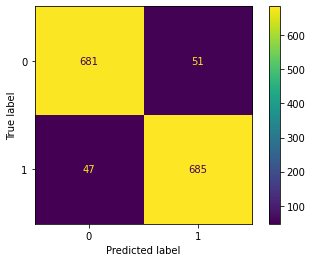

In [13]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    g_search,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


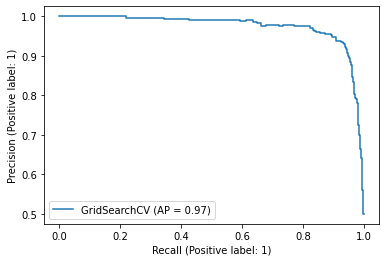

In [14]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    g_search,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


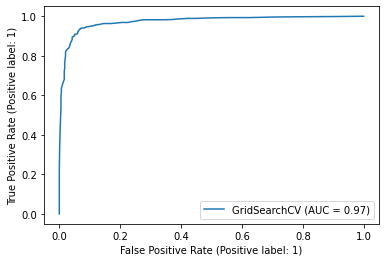

In [15]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    g_search,
    X_test,
    y_test
)

In [16]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    g_search.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       732
           1       0.93      0.94      0.93       732

    accuracy                           0.93      1464
   macro avg       0.93      0.93      0.93      1464
weighted avg       0.93      0.93      0.93      1464



In [31]:
# Best hyperparameters
print(pd.Series(g_search.best_params_))

class_weight    balanced
criterion        entropy
max_features        sqrt
dtype: object
